![alt text](https://miro.medium.com/max/1442/1*DBXf6dzNB78QPHGDofHA4Q.png)

#Load the Data

In [0]:
! git clone https://github.com/manmeet0307/EarData


Cloning into 'EarData'...
remote: Enumerating objects: 28576, done.
remote: Total 28576 (delta 0), reused 0 (delta 0), pack-reused 28576
Receiving objects: 100% (28576/28576), 95.41 MiB | 31.89 MiB/s, done.
Resolving deltas: 100% (6399/6399), done.
Checking out files: 100% (28412/28412), done.


In [0]:
!ls

EarData  sample_data


In [0]:
import os,shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


#Divide the Data into Test, Train and Validation Set



1.   Create Folders:Test,Train,Validation
2.   Split data
3.   Rearrage data according to their gender
4.   Move the data to their destination folder




In [0]:
classes=["Male","Female"]

In [0]:
if not os.path.isdir("test"):
  os.mkdir("test")

if not os.path.isdir("val"):
  os.mkdir("val")

if not os.path.isdir("train"):
  os.mkdir("train")

In [0]:
for c in classes:
  p=os.path.join("test",c)
  if not os.path.isdir(p):
    os.mkdir(p)


for c in classes:
  p=os.path.join("train",c)
  if not os.path.isdir(p):
    os.mkdir(p)

for c in classes:
  p=os.path.join("val",c)
  if not os.path.isdir(p):
    os.mkdir(p)


In [0]:
folders=os.listdir("EarData")
folders.index(".git")


18

In [0]:
folders.pop(18)
print(len(folders))

164


In [0]:
splitTrain=0.9
splitVal=0.8
# count=0
for f in folders:
  Subfolder="EarData"+"/"+f
  # count=count+1
  #print(count)
  #Total File in particular folder
  imgs=os.listdir(Subfolder)

  test_split_size=int(splitTrain*len(imgs))

  #Test_Set and Train_Set
  train_set=imgs[:test_split_size]
  test_set=imgs[test_split_size:]

  val_split_size=int(splitVal*len(train_set))

  #Validation_Set
  val_set=train_set[val_split_size:]
  train_set=train_set[:val_split_size]

  #Ear Type 
  label=str(f).split(".")[0]
  Subfolder_num=int(label)
  currLabel="Female"                              
  if(Subfolder_num>=1 and Subfolder_num<=98):
    currLabel="Male"

  #Train
  for img_train in train_set:
    src=os.path.join(Subfolder,img_train)
    dest=os.path.join("train/"+currLabel,img_train)
    shutil.move(src,dest)

  #Test
  for img_test in test_set:
    src=os.path.join(Subfolder,img_test)
    dest=os.path.join("test/"+currLabel,img_test)
    shutil.move(src,dest)

  #Validation 
  for img_val in val_set:
    src=os.path.join(Subfolder,img_val)
    dest=os.path.join("val/"+currLabel,img_val)
    shutil.move(src,dest)

In [0]:
print("Train:Female:",len(os.listdir("train/Female")))
print("Train:Male:",len(os.listdir("train/Male")))
print("****************************************************************************")
print("Test:Female:",len(os.listdir("test/Female")))
print("Test:Male:",len(os.listdir("test/Male")))
print("****************************************************************************")
print("Validation:Female:",len(os.listdir("val/Female")))
print("Validation:Male:",len(os.listdir("val/Male")))
print("****************************************************************************")


Train:Female: 7767
Train:Male: 12471
****************************************************************************
Test:Female: 1103
Test:Male: 1779
****************************************************************************
Validation:Female: 1971
Validation:Male: 3158
****************************************************************************


#Resnet Model---Fine Tunning( layer 171)

In [0]:
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.applications.resnet50 import ResNet50


In [0]:
model=ResNet50(include_top=False, weights='imagenet', input_shape=(150,150,3))


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step


In [0]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(256,activation='relu')(av1)
d1=Dropout(0.5)(fc1)
fc2=Dense(2,activation='softmax')(d1)

new_model=Model(input=model.input,output=fc2)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
adam=optimizers.adam(lr=1e-4)
new_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

In [0]:
for ix in range(len(new_model.layers)):
  print(ix, new_model.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f4b0bc442e8>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f4b0bc445f8>
2 <keras.layers.convolutional.Conv2D object at 0x7f4b0bc16cc0>
3 <keras.layers.normalization.BatchNormalization object at 0x7f4b0bc16f60>
4 <keras.layers.core.Activation object at 0x7f4b47444390>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f4aec35dfd0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f4b0bc165f8>
7 <keras.layers.convolutional.Conv2D object at 0x7f4b5e2caf98>
8 <keras.layers.normalization.BatchNormalization object at 0x7f4aec302b70>
9 <keras.layers.core.Activation object at 0x7f4aec302b38>
10 <keras.layers.convolutional.Conv2D object at 0x7f4aec304470>
11 <keras.layers.normalization.BatchNormalization object at 0x7f4aec2c2a58>
12 <keras.layers.core.Activation object at 0x7f4aec2c90f0>
13 <keras.layers.convolutional.Conv2D object at 0x7f4aec2d1390>
14 <keras.layers.convolutional.Conv2D object at 0x7f4aec2879e8>
15 <keras.lay

In [0]:
#from 171 let us do fine tuning
for ix in range(171):
  new_model.layers[ix].trainable=False

In [0]:
new_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

#Image Data Generator

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen=ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
)

val_gen=ImageDataGenerator(
    rescale=1/255.0,
)

In [0]:
train_generator=image_gen.flow_from_directory(
    "train/",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 20238 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'Female': 0, 'Male': 1}

In [0]:
val_generator=image_gen.flow_from_directory(
    "val/",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 5129 images belonging to 2 classes.


In [0]:
hist=new_model.fit_generator(
    train_generator,
    epochs=4,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/4
851/851 [==============================] - 156s 183ms/step - loss: 0.5153 - acc: 0.7520 - val_loss: 0.7818 - val_acc: 0.6380
Epoch 2/4
851/851 [==============================] - 146s 171ms/step - loss: 0.4349 - acc: 0.8003 - val_loss: 0.9518 - val_acc: 0.6172
Epoch 3/4
851/851 [==============================] - 144s 170ms/step - loss: 0.4088 - acc: 0.8142 - val_loss: 0.9995 - val_acc: 0.6146
Epoch 4/4
851/851 [==============================] - 144s 169ms/step - loss: 0.3883 - acc: 0.8262 - val_loss: 1.1400 - val_acc: 0.6094


In [0]:
hist=new_model.fit_generator(
    train_generator,
    epochs=10,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Epoch 1/10
851/851 [==============================] - 144s 170ms/step - loss: 0.3770 - acc: 0.8318 - val_loss: 1.1161 - val_acc: 0.6380
Epoch 2/10
851/851 [==============================] - 144s 169ms/step - loss: 0.3575 - acc: 0.8450 - val_loss: 1.1751 - val_acc: 0.6172
Epoch 3/10
851/851 [==============================] - 144s 170ms/step - loss: 0.3597 - acc: 0.8405 - val_loss: 1.3002 - val_acc: 0.6146
Epoch 4/10
851/851 [==============================] - 146s 171ms/step - loss: 0.3509 - acc: 0.8465 - val_loss: 1.3879 - val_acc: 0.6094
Epoch 5/10
851/851 [==============================] - 143s 168ms/step - loss: 0.3424 - acc: 0.8504 - val_loss: 1.5353 - val_acc: 0.5938
Epoch 6/10
851/851 [==============================] - 143s 169ms/step - loss: 0.3354 - acc: 0.8528 - val_loss: 1.4740 - val_acc: 0.6510
Epoch 7/10
851/851 [==============================] - 142s 167ms/step - loss: 0.3282 - acc: 0.8612 - val_loss: 1.6030 - val_acc: 0.6198
Epoch 8/10
851/851 [============================

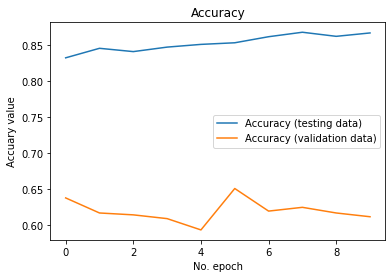

In [0]:
ACC=hist.history['acc']
VAL_ACC=hist.history['val_acc']
# Plot history: Accuracy
plt.plot(ACC, label='Accuracy (testing data)')
plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuary value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


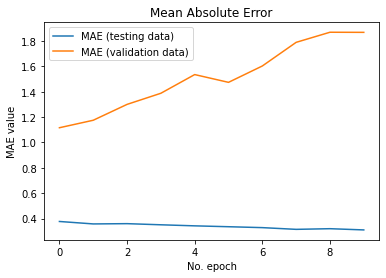

In [0]:
LOSS=hist.history['loss']
VAL_LOSS=hist.history['val_loss']
# Plot history: Mean Absolute Error
plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')
plt.title('Mean Absolute Error')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


#Resnet Model---Fine Tunning( layer 168)

In [0]:
resnet2=ResNet50(include_top=False, weights='imagenet', input_shape=(150,150,3))
av1=GlobalAveragePooling2D()(resnet2.output)
fc1=Dense(256,activation='relu')(av1)
d1=Dropout(0.5)(fc1)
fc2=Dense(2,activation='softmax')(d1)

resnet2_model=Model(input=resnet2.input,output=fc2)
adam=optimizers.adam(lr=1e-4)
resnet2_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [0]:
resnet2_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])
resnet2_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
#from 168 let us do fine tuning
for ix in range(168):
  resnet2_model.layers[ix].trainable=False

In [0]:
resnet2_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

resnet2_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
hist=new_model.fit_generator(
    train_generator,
    epochs=10,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Epoch 1/10
851/851 [==============================] - 158s 186ms/step - loss: 0.3052 - acc: 0.8701 - val_loss: 1.7356 - val_acc: 0.6380
Epoch 2/10
851/851 [==============================] - 148s 174ms/step - loss: 0.3026 - acc: 0.8711 - val_loss: 1.7372 - val_acc: 0.6172
Epoch 3/10
851/851 [==============================] - 147s 173ms/step - loss: 0.2996 - acc: 0.8711 - val_loss: 1.8713 - val_acc: 0.6146
Epoch 4/10
851/851 [==============================] - 146s 171ms/step - loss: 0.2943 - acc: 0.8759 - val_loss: 1.9087 - val_acc: 0.6094
Epoch 5/10
851/851 [==============================] - 145s 171ms/step - loss: 0.2922 - acc: 0.8757 - val_loss: 1.9702 - val_acc: 0.5938
Epoch 6/10
851/851 [==============================] - 146s 171ms/step - loss: 0.2907 - acc: 0.8741 - val_loss: 1.7504 - val_acc: 0.6510
Epoch 7/10
851/851 [==============================] - 145s 170ms/step - loss: 0.2875 - acc: 0.8795 - val_loss: 2.0079 - val_acc: 0.6198
Epoch 8/10
851/851 [============================

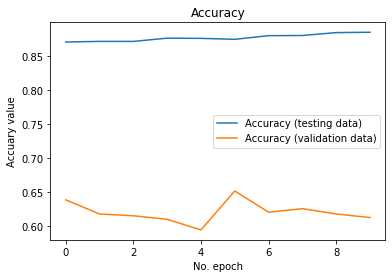

In [0]:
ACC=hist.history['acc']
VAL_ACC=hist.history['val_acc']
# Plot history: Accuracy
plt.plot(ACC, label='Accuracy (testing data)')
plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuary value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


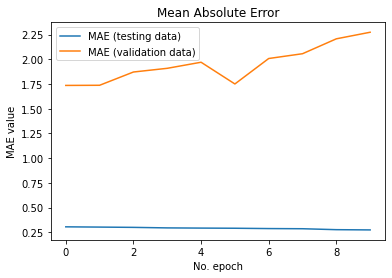

In [0]:
LOSS=hist.history['loss']
VAL_LOSS=hist.history['val_loss']
# Plot history: Mean Absolute Error
plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')
plt.title('Mean Absolute Error')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()
